In [ ]:
from rdkit import Chem
from rdkit.Chem import rdmolfiles
from rdkit.Chem.Draw import MolToFile, MolDrawOptions
from rdkit.Chem.PandasTools import drawOptions

In [ ]:
import os
print(os.getcwd())

In [ ]:
m = Chem.MolFromSmiles('[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O')
m

In [ ]:

from rdkit.Chem import Draw
penisvg = Draw.MolToImage(m, format='svg')
penisvg



In [ ]:
saved = Draw.MolsToGridImage(mols=Any,useSVG=True,)

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import MolFromSmiles
import os
input_folder_path = "www/smiles"
with open(input_file_path, 'r') as file:
    input_smiles = file.read().strip()
canvas_width_pixels = 300
canvas_height_pixels  = 300
# input_smiles = '[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O'
mol = MolFromSmiles(input_smiles)
mol = rdMolDraw2D.PrepareMolForDrawing(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(canvas_width_pixels,canvas_height_pixels)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
output_path = "www/smiles"
with open('www/smiles/output.svg', 'w') as f:
    f.write(svg)

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import MolFromSmiles
import os
input_folder_path = "www/smiles"
output_folder_path ="www/smilesOP"
canvas_width_pixels = 300
canvas_height_pixels  = 300
for filename in os.listdir(input_folder_path):
    if filename.endswith(".smiles"):
        input_file_path = os.path.join(input_folder_path, filename)

        with open(input_file_path, 'r') as file:
            input_smiles = file.read().strip()
            mol = MolFromSmiles(input_smiles)
            if mol is None:
                print(f"could not parse the SMILES in: {filename}")
    mol = rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(canvas_width_pixels,canvas_height_pixels)

    options = drawer.drawOptions()
    options.clearBackground = True

    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    output_file_path = os.path.join(output_folder_path, filename.replace(".smiles", ".svg"))
    with open(output_file_path, 'w') as output_file:
        output_file.write(svg)

    print(f"Generated: {output_file_path}")


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
import os

# Make depiction cleaner
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize = 15

# File paths for the SMILES files
input_folder_path = "www/smiles"
cef_file = os.path.join(input_folder_path, "Ceftriaxone.smiles")
pen_file = os.path.join(input_folder_path, "PenicillinG.smiles")

# Read SMILES strings from the files
with open(cef_file, 'r') as file1, open(pen_file, 'r') as file2:
    cef_smiles = file1.read().strip()
    pen_smiles = file2.read().strip()

# Convert SMILES strings to RDKit molecule objects
mol1 = Chem.MolFromSmiles(cef_smiles)
mol2 = Chem.MolFromSmiles(pen_smiles)

if mol1 is None or mol2 is None:
    raise ValueError("One or both SMILES strings could not be parsed into valid molecules.")

# Visualize molecules in a grid
Draw.MolsToGridImage([mol1, mol2])


# Function to view similarities between the two molecules
def view_similarity(mol1, mol2):
    # Find the Maximum Common Substructure (MCS)
    mcs = rdFMCS.FindMCS([mol1, mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

    # Find the atom matches in both molecules for the MCS
    match1 = mol1.GetSubstructMatch(mcs_mol)  # Atoms in mol1 that match the MCS
    match2 = mol2.GetSubstructMatch(mcs_mol)  # Atoms in mol2 that match the MCS

    # Return a grid image highlighting the similarities
    return Draw.MolsToGridImage(
        [mol1, mol2],
        highlightAtomLists=[list(match1), list(match2)]  # Highlight the matching atoms only
    )


# View the similarities between Ceftriaxone and PenicillinG
view_similarity(mol1, mol2)


Matches for Beta-Lactam Ring in Ampicillin: ((0, 12, 14, 15, 23, 22, 13, 1),)
Matches for Penicillin R Group in Ampicillin: ()
Matches for Cephalosporin R1 Group in Ampicillin: ()
Matches for Cephalosporin R2 Group in Ampicillin: ()
Matches for Beta-Lactam Ring in Ceftriaxone: ((0, 14, 16, 17, 35, 34, 15, 1),)
Matches for Penicillin R Group in Ceftriaxone: ()
Matches for Cephalosporin R1 Group in Ceftriaxone: ()
Matches for Cephalosporin R2 Group in Ceftriaxone: ()
Ampicillin


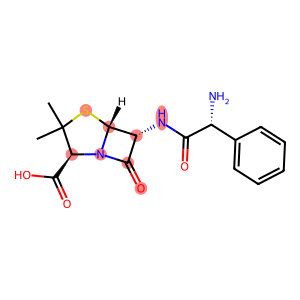

Ceftriaxone


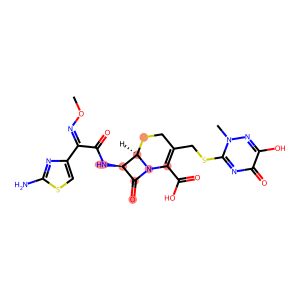

In [8]:
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Define refined SMARTS patterns
smarts_patterns = {
    "Beta-Lactam Ring": "C1(C(N(*)C1*)=O)*",  # beta-lactam ring definition from ChEBI
    "Penicillin R Group": "C=C=C", # fake group to test ring match # C(C(=O)O)[C@@H](N) Penicillin side chain
    "Cephalosporin R1 Group": "C=C=C" ,  # "CS[C@@H]" Cephalosporin R1 sulfur-containing chain
    "Cephalosporin R2 Group": "C=C=C",  #  "C3=CSC(N)=N3" Cephalosporin R2 heterocyclic group
}

# Define highlight colors for each component
highlight_colors = {
    "Beta-Lactam Ring": (0, 0, 1),  # Blue for beta-lactam ring
    "R Group": (1, 0, 0)  # Red for side chains (R groups)
}

# SMILES strings for beta-lactam antibiotics
antibiotics_smiles = {
    "Ampicillin": "[H][C@@]1(NC(=O)[C@H](N)C2=CC=CC=C2)C(=O)N2[C@@H](C(O)=O)C(C)(C)S[C@]12[H]",
    "Ceftriaxone": "[H][C@@]1(NC(=O)C(=N/OC)\C2=CSC(N)=N2)C(=O)N2C(C(O)=O)=C(CSC3=NC(=O)C(O)=NN3C)CS[C@]12[H]"
}

# Analyze and highlight SMARTS matches in molecules
highlighted_images = []
for name, smiles in antibiotics_smiles.items():
    mol = Chem.MolFromSmiles(smiles)  # Parse molecule from SMILES
    if not mol:
        print(f"Failed to parse molecule for {name}")
        continue

    # Initialize lists for atoms and color mapping
    highlight_atoms = []  # Collect atoms for highlighting
    highlight_colors_atoms = {}  # Store color mapping for matched atoms

    # Loop through the SMARTS patterns and find matches
    for pattern_name, pattern_smarts in smarts_patterns.items():
        smarts_mol = Chem.MolFromSmarts(pattern_smarts)
        matches = mol.GetSubstructMatches(smarts_mol)  # Find SMARTS matches

        # DEBUG: Print matches for each molecule
        print(f"Matches for {pattern_name} in {name}: {matches}")

        # Process matches
        if matches:
            for match in matches:
                highlight_atoms.extend(match)
                # Assign blue for beta-lactam, red for R groups
                atom_color = (
                    highlight_colors["Beta-Lactam Ring"]
                    if pattern_name == "Beta-Lactam Ring"
                    else highlight_colors["R Group"]
                )
                for atom_idx in match:
                    highlight_colors_atoms[atom_idx] = atom_color

    # Ensure consistent and clean highlighting (if no matches, skip)
    if not highlight_atoms:
        print(f"No matches found for {name}.")
        continue

    # Generate molecule image with highlights
    img = Draw.MolToImage(
        mol,
        highlightAtoms=highlight_atoms,
        highlightAtomColors=highlight_colors_atoms
    )
    highlighted_images.append((name, img))

# Display the collected images
for name, img in highlighted_images:
    print(name)
    display(img)
